In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.5 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
from PIL import Image
import requests
import numpy as np

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
model = YOLO('yolov8m.pt')

In [6]:
print(f"Модель: {model.__class__.__name__}")
print(f"Архитектура: YOLOv8m")

class_names = model.names
num_classes = len(class_names)

print(f"\nКоличество классов в модели: {num_classes}")
print("Список классов:")
for i, name in class_names.items():
    print(f"  {i:3d}: {name}")

model.val(data='coco.yaml')

Модель: YOLO
Архитектура: YOLOv8m

Количество классов в модели: 80
Список классов:
    0: person
    1: bicycle
    2: car
    3: motorcycle
    4: airplane
    5: bus
    6: train
    7: truck
    8: boat
    9: traffic light
   10: fire hydrant
   11: stop sign
   12: parking meter
   13: bench
   14: bird
   15: cat
   16: dog
   17: horse
   18: sheep
   19: cow
   20: elephant
   21: bear
   22: zebra
   23: giraffe
   24: backpack
   25: umbrella
   26: handbag
   27: tie
   28: suitcase
   29: frisbee
   30: skis
   31: snowboard
   32: sports ball
   33: kite
   34: baseball bat
   35: baseball glove
   36: skateboard
   37: surfboard
   38: tennis racket
   39: bottle
   40: wine glass
   41: cup
   42: fork
   43: knife
   44: spoon
   45: bowl
   46: banana
   47: apple
   48: sandwich
   49: orange
   50: broccoli
   51: carrot
   52: hot dog
   53: pizza
   54: donut
   55: cake
   56: chair
   57: couch
   58: potted plant
   59: bed
   60: dining table
   61: toilet
   6

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x799e7d896b40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024

Проверка работы модели


0: 480x640 3 elephants, 91.3ms
Speed: 20.4ms preprocess, 91.3ms inference, 39.1ms postprocess per image at shape (1, 3, 480, 640)
Найдено слонов: 3


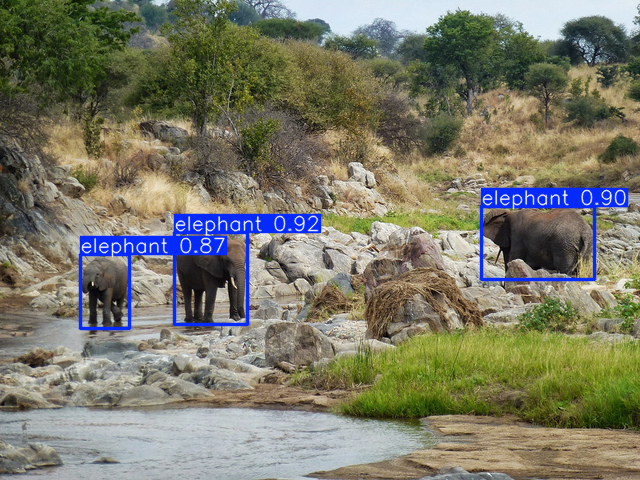

In [ ]:
image = image = Image.open('/content/38.jpg')

results = model(image)

elephant_count = 0
for r in results:
    for box in r.boxes:
        if int(box.cls[0]) == 20:  # 20 = elephant
            elephant_count += 1

print(f"Найдено слонов: {elephant_count}")

results[0].show()

Веб-интерфейс

In [ ]:
!pip install weasyprint

In [ ]:
import gradio as gr
import cv2
import numpy as np
from PIL import Image
from ultralytics import YOLO
from datetime import datetime
import os
import pytz
import json
from weasyprint import HTML
import tempfile

In [ ]:
class ElephantCounter:
    def __init__(self, model_name='yolov8m.pt'):
        print("Загрузка модели YOLO...")
        self.model = YOLO(model_name)
        self.ELEPHANT_CLASS_ID = 20
        print("Модель загружена!")

        self.history_file = "elephant_detection_history.json"
        self.init_history_file()

    def init_history_file(self):
        if not os.path.exists(self.history_file):
            moscow_time = get_moscow_time()

            history_data = {
                "created_at": moscow_time.isoformat(),
                "total_requests": 0,
                "requests": []
            }
            with open(self.history_file, 'w', encoding='utf-8') as f:
                json.dump(history_data, f, ensure_ascii=False, indent=2)
            print(f"Создан новый файл истории: {self.history_file}")

    def save_to_history(self, images_count, total_elephants, zones_info, report_text, pdf_filename=None):
        try:
            moscow_time = get_moscow_time()

            with open(self.history_file, 'r', encoding='utf-8') as f:
                history_data = json.load(f)

            new_record = {
                "id": history_data["total_requests"] + 1,
                "timestamp_display": moscow_time.strftime("%d.%m.%Y %H:%M:%S") + " MSK (UTC+3)",
                "images_count": images_count,
                "zones_analyzed": zones_info,
                "total_elephants": total_elephants,
                "pdf_file": pdf_filename,
                "report_preview": report_text[:500] + "..." if len(report_text) > 500 else report_text
            }

            history_data["requests"].append(new_record)
            history_data["total_requests"] += 1
            history_data["last_updated"] = get_moscow_time().isoformat()

            with open(self.history_file, 'w', encoding='utf-8') as f:
                json.dump(history_data, f, ensure_ascii=False, indent=2)

            print(f"Запись #{new_record['id']} сохранена в историю")
            return True

        except Exception as e:
            print(f"Ошибка при сохранении в историю: {e}")
            return False

    def get_history_summary(self):
        try:
            with open(self.history_file, 'r', encoding='utf-8') as f:
                history_data = json.load(f)

            summary = {
                "total_requests": history_data["total_requests"],
                "last_request": None,
                "total_elephants_detected": 0
            }

            for request in history_data["requests"]:
                summary["total_elephants_detected"] += request.get("total_elephants", 0)

            if history_data["requests"]:
                last_request = history_data["requests"][-1]
                summary["last_request"] = {
                    "zones": last_request.get("zones_analyzed", 0),
                    "elephants": last_request.get("total_elephants", 0)
                }

            return summary

        except Exception as e:
            print(f"Ошибка при чтении истории: {e}")
            return None

    def predict_single_image(self, image):
        if isinstance(image, Image.Image):
            image_np = np.array(image)
            if image_np.shape[2] == 4:
                image_np = cv2.cvtColor(image_np, cv2.COLOR_RGBA2RGB)
            else:
                image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
        else:
            image_np = image

        original = image_np.copy()
        height, width = original.shape[:2]

        results = self.model(original, conf=0.25)

        elephant_count = 0
        annotated_image = original.copy()

        for result in results:
            if result.boxes is not None:
                boxes = result.boxes.xyxy.cpu().numpy()
                confidences = result.boxes.conf.cpu().numpy()
                class_ids = result.boxes.cls.cpu().numpy().astype(int)

                for box, conf, cls_id in zip(boxes, confidences, class_ids):
                    if cls_id == self.ELEPHANT_CLASS_ID:
                        elephant_count += 1
                        x1, y1, x2, y2 = map(int, box)

                        cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 3)

                        label = f"elephant: {conf:.1%}"
                        cv2.putText(
                            annotated_image,
                            label,
                            (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX,
                            0.7,
                            (0, 255, 0),
                            2
                        )

        if elephant_count == 1:
            counter_text = f"ELEPHANTS: {elephant_count} (1 elephant found)"
        else:
            counter_text = f"ELEPHANTS: {elephant_count}"

        cv2.putText(
            annotated_image,
            counter_text,
            (20, 50),
            cv2.FONT_HERSHEY_SIMPLEX,
            1.5,
            (0, 255, 0),
            3
        )

        if elephant_count == 0:
            cv2.putText(
                annotated_image,
                "No elephants found",
                (width // 2 - 150, height // 2),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (255, 0, 0),
                2
            )

        annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

        return elephant_count, annotated_image_rgb

In [ ]:
def get_moscow_time():
    moscow_tz = pytz.timezone('Europe/Moscow')
    utc_now = datetime.now(pytz.utc)
    moscow_time = utc_now.astimezone(moscow_tz)

    return moscow_time

In [ ]:
def create_pdf_report(report_text, num_zones):
    moscow_time = get_moscow_time()
    timestamp = moscow_time.strftime("%Y-%m-%d_%H-%M-%S")

    filename = f"Отчет_слоны_{timestamp}.pdf"

    html_content = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <meta charset="UTF-8">
        <title>Отчет об анализе слонов</title>
        <style>
            body {{ font-family: Arial, sans-serif; margin: 40px; }}
            h1 {{ color: #2c3e50; text-align: center; }}
            h2 {{ color: #3498db; }}
            h3 {{ color: #2c3e50; }}
            .header {{ text-align: center; margin-bottom: 30px; }}
            .info {{ margin-bottom: 20px; }}
            .section {{ margin-bottom: 15px; }}
            .zone {{ margin-left: 20px; margin-bottom: 10px; }}
            .footer {{ text-align: center; margin-top: 40px; font-style: italic; color: #7f8c8d; }}
            .divider {{ border-top: 2px solid #3498db; margin: 20px 0; }}
            .timestamp {{ color: #7f8c8d; font-size: 14px; }}
            .moscow-time {{ color: #e74c3c; font-weight: bold; }}
        </style>
    </head>
    <body>
        <div class="header">
            <h1>ОТЧЕТ ОБ АНАЛИЗЕ СЛОНОВ</h1>
            <div class="info">
                <p><strong>Дата и время создания (Москва):</strong>
                   <span class="moscow-time">{moscow_time.strftime('%d.%m.%Y %H:%M:%S')}</span></p>
                <p><strong>Количество зон наблюдения:</strong> {num_zones}</p>
                <p class="timestamp">Часовой пояс: MSK (UTC+3)</p>
            </div>
        </div>
        <div class="divider"></div>
    """

    lines = report_text.split('\n')
    for line in lines:
        if line.strip():
            if 'ОТЧЕТ' in line or 'ИТОГОВАЯ' in line:
                html_content += f'<h2>{line}</h2>'
            elif 'ЗОНА' in line and ':' in line:
                html_content += f'<h3>{line}</h3>'
            elif '=' in line and len(line.replace('=', '').strip()) == 0:
                html_content += '<div class="divider"></div>'
            else:
                html_content += f'<p>{line}</p>'

    html_content += """
        <div class="divider"></div>
        <div class="footer">
            <p>Отчет создан автоматически системой детекции слонов</p>
            <p class="timestamp">Все временные отметки указаны по московскому времени (MSK)</p>
        </div>
    </body>
    </html>
    """

    with tempfile.NamedTemporaryFile(mode='w', suffix='.html', delete=False, encoding='utf-8') as f:
        f.write(html_content)
        temp_html = f.name

    HTML(temp_html).write_pdf(filename)

    os.unlink(temp_html)

    return filename

In [ ]:
def create_main_interface():

    current_report_data = {"text": "", "num_zones": 0, "timestamp": "", "total_elephants": 0}

    def create_interface_for_zones(num_zones):

        def analyze_zones(*images):
            global elephant_counter

            images_filtered = [img for img in images if img is not None]

            if not images_filtered:
                return [], "Ошибка: Не загружено ни одного изображения", gr.update(visible=False)

            moscow_time = get_moscow_time()
            date_str = moscow_time.strftime("%d.%m.%Y %H:%M:%S")

            results = []
            report_text = f"ОТЧЕТ ПО АНАЛИЗУ ЗОН НАБЛЮДЕНЯ\n"
            report_text += f"Дата и время анализа (Москва): {date_str}\n"
            report_text += "=" * 50 + "\n\n"

            total_elephants = 0

            for i, image in enumerate(images_filtered):
                elephant_count, annotated_image = elephant_counter.predict_single_image(image)

                results.append((annotated_image, f"Зона наблюденя {i+1}: {elephant_count} слонов"))

                report_text += f"ЗОНА НАБЛЮДЕНИЯ {i+1}:\n"
                report_text += f"    Слонов: {elephant_count}\n\n"

                total_elephants += elephant_count

            report_text += "=" * 50 + "\n"
            report_text += "ИТОГОВАЯ СТАТИСТИКА:\n\n"
            report_text += f"Всего зон наблюденя проанализировано: {len(images_filtered)}\n"
            report_text += f"Общее количество слонов: {total_elephants}\n\n"

            if total_elephants == 0:
                report_text += "Слоны не обнаружены ни в одной зоне."
            elif total_elephants == 1:
                report_text += "Обнаружен 1 слон."
            else:
                report_text += f"Обнаружено {total_elephants} слонов."

            current_report_data["text"] = report_text
            current_report_data["num_zones"] = len(images_filtered)
            current_report_data["total_elephants"] = total_elephants

            elephant_counter.save_to_history(
                images_count=len(images_filtered),
                total_elephants=total_elephants,
                zones_info=len(images_filtered),
                report_text=report_text,
                pdf_filename=None
            )

            return results, report_text, gr.update(visible=True)

        def save_to_pdf():
            if not current_report_data["text"]:
                return "Ошибка: Нет данных для сохранения. Сначала выполните анализ."

            try:
                filename = create_pdf_report(
                    current_report_data["text"],
                    current_report_data["num_zones"]
                )

                elephant_counter.save_to_history(
                    images_count=current_report_data["num_zones"],
                    total_elephants=current_report_data["total_elephants"],
                    zones_info=current_report_data["num_zones"],
                    report_text=current_report_data["text"],
                    pdf_filename=filename
                )

                return f"Отчет сохранен как: {filename}"

            except Exception as e:
                return f"Ошибка при сохранении PDF: {str(e)}"

        with gr.Blocks() as interface:
            gr.Markdown(f"Детектор слонов ({num_zones} зон)")

            description = f"""
            **Инструкция:**
            1. Загрузите изображения в {num_zones} зоны наблюдения
            2. Нажмите 'Анализировать все зоны'
            4. Получите результаты для каждой зоны и общий отчет
            5. Сохраните отчет в PDF при необходимости

            **Время:** Все временные отметки указываются по московскому времени (MSK)
            **История:** Все запросы автоматически сохраняются в файл `{elephant_counter.history_file}`
            """
            gr.Markdown(description)

            zone_inputs = []

            for i in range(num_zones):
                with gr.Row(variant="panel"):
                    with gr.Column():
                        gr.Markdown(f"### Зона видимости {i+1}")
                        zone_input = gr.Image(
                            label=f"Изображение зоны наблюдения {i+1}",
                            type="pil",
                            sources=["upload"],
                            height=150
                        )
                        zone_inputs.append(zone_input)

            analyze_btn = gr.Button("Анализировать все зоны", variant="primary", size="lg")

            with gr.Row():
                with gr.Column(scale=1):
                    output_gallery = gr.Gallery(
                        label="Результаты по зонам наблюдения",
                        columns=min(3, num_zones),
                        height="auto"
                    )

                with gr.Column(scale=1):
                    output_report = gr.Textbox(
                        label="Отчет по анализу",
                        lines=15
                    )

            with gr.Row():
                save_pdf_btn = gr.Button("💾 Сохранить отчет в PDF", variant="secondary", visible=False)
                pdf_status = gr.Textbox(
                    label="Статус сохранения",
                    lines=2,
                    visible=False
                )

            def on_analyze(*images):
                results, report, pdf_visible = analyze_zones(*images)
                return results, report, gr.update(visible=True), gr.update(visible=True)

            analyze_btn.click(
                fn=on_analyze,
                inputs=zone_inputs,
                outputs=[output_gallery, output_report, save_pdf_btn, pdf_status]
            )

            save_pdf_btn.click(
                fn=save_to_pdf,
                inputs=[],
                outputs=[pdf_status]
            )

        return interface

    with gr.Blocks(theme=gr.themes.Soft(), title="Настройка детектора слонов") as main_interface:
        gr.Markdown("Настройка многозонного детектора слонов")

        moscow_time = get_moscow_time()
        current_time_str = moscow_time.strftime("%d.%m.%Y %H:%M:%S")

        gr.Markdown(f"""
        **Текущее московское время:** {current_time_str} (MSK)
        **Файл истории запросов:** `{elephant_counter.history_file}`

        **Все запросы автоматически сохраняются в JSON файл.**

        Выберите количество зон наблюдения для анализа
        """)

        with gr.Row():
            zone_slider = gr.Slider(
                minimum=1,
                maximum=10,
                value=3,
                step=1,
                label="Количество зон наблюдения"
            )

            zone_display = gr.Number(
                value=3,
                label="Выбрано зон",
                interactive=False
            )

        def update_display(num_zones):
            return num_zones

        zone_slider.change(
            fn=update_display,
            inputs=[zone_slider],
            outputs=[zone_display]
        )

        interface_tabs = []
        for num_zones in range(1, 11):
            with gr.Tab(f"{num_zones} зон", visible=(num_zones==3)) as tab:
                interface = create_interface_for_zones(num_zones)
                interface_tabs.append(tab)

        def show_interface(num_zones):
            updates = []
            for i in range(1, 11):
                updates.append(gr.update(visible=(i == num_zones)))
            return updates

        zone_slider.change(
            fn=show_interface,
            inputs=[zone_slider],
            outputs=interface_tabs
        )

    return main_interface

In [ ]:
def main():
    global elephant_counter

    print("Загрузка модели YOLO...")
    elephant_counter = ElephantCounter()

    moscow_time = get_moscow_time()

    print(f"Файл истории запросов: {elephant_counter.history_file}")

    summary = elephant_counter.get_history_summary()
    if summary:
        print(f"Всего запросов в истории: {summary['total_requests']}")
        print(f"Всего обнаружено слонов: {summary['total_elephants_detected']}")

    print("\nЗапуск интерфейса...")
    print("Откройте интерфейс, выберите количество зон с помощью слайдера")
    print("=" * 50)

    main_interface = create_main_interface()
    main_interface.launch(share=True, debug=True)

In [ ]:
main()

Загрузка модели YOLO...
Загрузка модели YOLO...
Модель загружена!
Файл истории запросов: elephant_detection_history.json
Всего запросов в истории: 0
Всего обнаружено слонов: 0

Запуск интерфейса...
Откройте интерфейс, выберите количество зон с помощью слайдера


/tmp/ipython-input-795368650.py:155: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(theme=gr.themes.Soft(), title="Настройка детектора слонов") as main_interface:


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://69427ec1dad3193659.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



0: 416x640 2 elephants, 49.7ms
Speed: 1.5ms preprocess, 49.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)

0: 448x640 3 elephants, 49.8ms
Speed: 1.7ms preprocess, 49.8ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 1 elephant, 51.6ms
Speed: 1.7ms preprocess, 51.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 448x640 3 elephants, 23.7ms
Speed: 1.8ms preprocess, 23.7ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Запись #1 сохранена в историю


DEBUG:fontTools.ttLib.ttFont:Reading 'maxp' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'maxp' table
DEBUG:fontTools.subset.timer:Took 0.002s to load 'maxp'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'maxp'
INFO:fontTools.subset:maxp pruned
DEBUG:fontTools.ttLib.ttFont:Reading 'cmap' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'cmap' table
DEBUG:fontTools.ttLib.ttFont:Reading 'post' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'post' table
DEBUG:fontTools.subset.timer:Took 0.004s to load 'cmap'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'cmap'
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:fpgm dropped
INFO:fontTools.subset:prep dropped
INFO:fontTools.subset:cvt  dropped
INFO:fontTools.subset:kern dropped
DEBUG:fontTools.subset.timer:Took 0.000s to load 'post'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'post'
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:GPOS dropped
INFO:fontTools.subset:GSUB dropped
DEBUG:f

Запись #2 сохранена в историю

0: 448x640 2 elephants, 29.0ms
Speed: 2.1ms preprocess, 29.0ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 4 elephants, 27.2ms
Speed: 1.9ms preprocess, 27.2ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
Запись #3 сохранена в историю
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://69427ec1dad3193659.gradio.live
